<a href="https://colab.research.google.com/github/michaelahulman/M7DataSP/blob/main/dummy_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import pandas as pd

# Define file_path
file_path = '/dummy_data_mkt - Mockup6_standardized.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()

,Source,Medium,Campaign name,Revenue (Consent),Revenue (All),Spend,CPC,Visits,CTR,Bounced Sessions,Bounce Rate,AddToCart,Purchase,Conversion Rate,Date
0,pinterest,cpc,campaign34,2467.814746,7764.430864,683.927674,8.785239,78.358928,0.108295,155.158494,0.235916,34.692628,15.681229,0.166996,2024-01-01
1,pinterest,cpc,campaign37,4116.729190,10232.366460,413.680954,3.452972,100.957368,0.198344,323.500974,0.330115,39.577286,6.635332,0.151793,2024-01-01
2,google,cpc,campaign5,2939.020810,6760.523076,845.710643,5.997659,134.454903,0.179409,327.002034,0.219475,71.117992,10.928944,0.176328,2024-01-01
3,facebook,cpc,campaign14,3763.971342,10537.081270,664.034508,5.315919,132.419247,0.116230,487.539261,0.381167,34.641421,9.512315,0.070823,2024-01-01
4,tiktok,cpc,campaign31,2924.888449,8747.598489,1090.348574,9.124123,107.671550,0.170160,100.198085,0.095054,51.559963,18.715997,0.086029,2024-01-01


In [62]:
# We will be looking at mean revenue per source, mean cpc across sources, and potential relationships between: conversion rate and bounce rate, and date and purchase.

In [69]:
# Mean revenue (all) per source
# We first print all the unique campaign sources for a brief check and create a separate df for each of the data sources.
unique_sources = df['Source'].unique()
# Print the unique values
print(unique_sources)





['pinterest' 'google' 'facebook' 'tiktok' 'bing' 'seznam']


In [70]:
# Create a dictionary to store the separate df
source_dfs = {}

# Iterate through unique sources and create df
for source in unique_sources:
  source_dfs[source] = df[df['Source'] == source]

# Access individual df using the source as the key
#google_df = source_dfs['google']
#pinterest_df = source_dfs['pinterest']
#facebook_df = source_dfs['facebook']
#tiktok_df = source_dfs['tiktok']
#bing_df = source_dfs['bing']
#seznam_df = source_dfs['seznam']

In [71]:
# Display the first few rows of a random df
facebook_df.head()

# Lastly, we calculate mean revenue for each source
for source, df in source_dfs.items():
  mean_revenue = df['Revenue (All)'].mean()
  print(f"Mean revenue for {source}: {mean_revenue}")

Mean revenue for pinterest: 8280.545753021857
Mean revenue for google: 5629.849985846995
Mean revenue for facebook: 9055.91745546357
Mean revenue for tiktok: 8903.895087248633
Mean revenue for bing: 6585.298947992715
Mean revenue for seznam: 8810.836846630236


In [72]:
# Mean CPC per source
for source, df in source_dfs.items():
    mean_cpc = df['CPC'].mean()
    print(f"Mean CPC for {source}: {mean_cpc}")



Mean CPC for pinterest: 6.738879888196721
Mean CPC for google: 3.710293208898907
Mean CPC for facebook: 4.949519434738615
Mean CPC for tiktok: 9.913354858360657
Mean CPC for bing: 3.359683899730419
Mean CPC for seznam: 3.7591959104881605


In [86]:
# Exploring relationship between date and purchase
# Convert 'date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Aggregate purchases by date
daily_purchases = df.groupby('Date')['Purchase'].sum().reset_index()

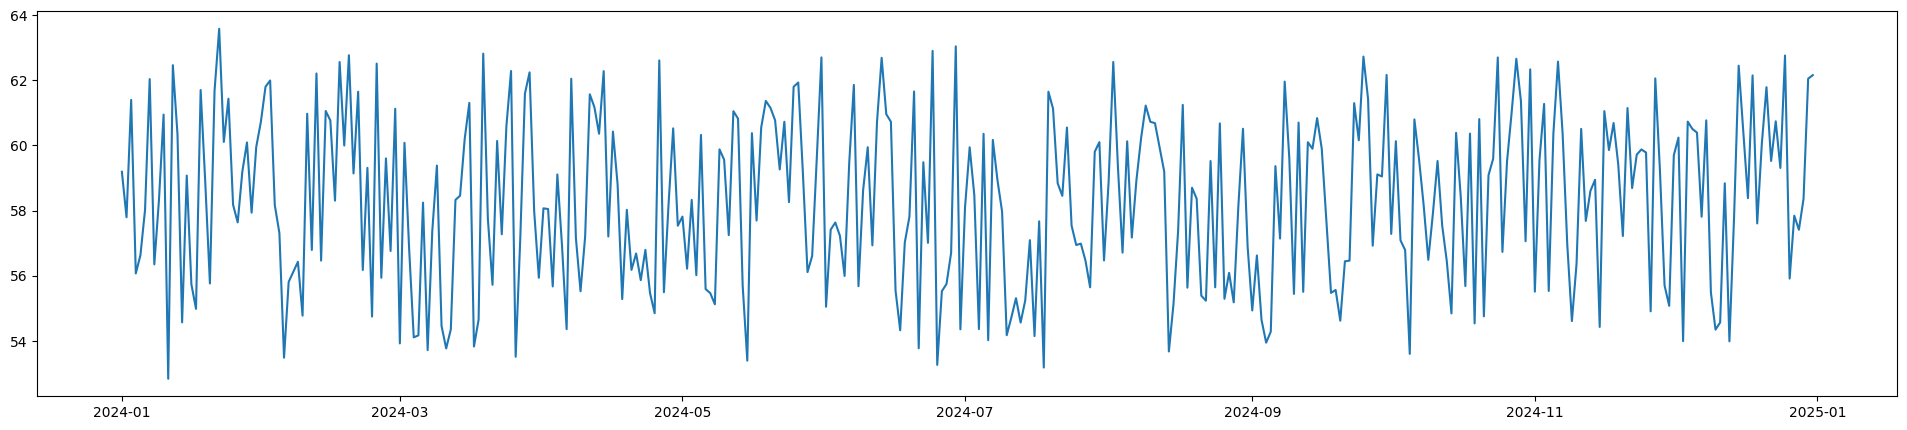

In [91]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a figure and axes
fig, ax = plt.subplots(figsize=(24, 5))

# Plot the purchase trend
ax.plot(daily_purchases['Date'], daily_purchases['Purchase'])
